# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter

In [33]:
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?', header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [34]:
dt_best_gini_accuracy = 0
dt_best_entropy_accuracy = 0

1. a) Implement a decision tree (you can use decision tree implementation from existing libraries).

In [35]:
def decision_tree(X_train, y_train, criterion, max_depth=None, min_samples_leaf=2,min_samples_split = 2, min_impurity_decrease=0, ccp_alpha = 0.0):
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_impurity_decrease=min_impurity_decrease, random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    return clf

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [36]:
X = data.drop(['Diagnosis'], axis=1)
y = data['Diagnosis']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt_split_gini = decision_tree(X_train, y_train, 'gini')
dt_split_entropy = decision_tree(X_train, y_train, 'entropy')

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [38]:
gini_accuracy = accuracy_score(y_test, dt_split_gini.predict(X_test))
entropy_accuracy = accuracy_score(y_test, dt_split_entropy.predict(X_test))

In [39]:
print('Accuracy of DT using Gini Index:', gini_accuracy)
print('Accuracy of DT using Entropy:', entropy_accuracy)

print(max(gini_accuracy, entropy_accuracy))

dt_best_gini_accuracy = max(dt_best_gini_accuracy, gini_accuracy)
dt_best_entropy_accuracy = max(dt_best_entropy_accuracy, entropy_accuracy)

Accuracy of DT using Gini Index: 0.9542857142857143
Accuracy of DT using Entropy: 0.9428571428571428
0.9542857142857143


1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches. 

### Method 1: Controlling the maximum depth of the decision tree

We will allow the tree to grow to a maximum depth. If the maximum depth allowed is too high, the desicion tree might overfit on the training data.

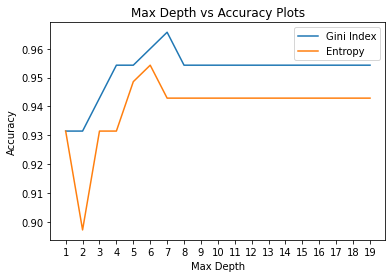

In [40]:
plt.title('Max Depth vs Accuracy Plots')
gini_accuracies = []
entropy_accuracies = []
for d in range(1, 20):
    dt_gini = decision_tree(X_train, y_train, 'gini', max_depth=d)
    gini_acc = accuracy_score(y_test, dt_gini.predict(X_test))
    gini_accuracies.append(gini_acc)
    dt_entropy = decision_tree(X_train, y_train, 'entropy', max_depth=d)
    entropy_acc = accuracy_score(y_test, dt_entropy.predict(X_test))
    entropy_accuracies.append(entropy_acc)
plt.xticks(range(1,20))
plt.plot(range(1,20), gini_accuracies, label='Gini Index')
plt.plot(range(1,20), entropy_accuracies, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

dt_best_gini_accuracy = max(dt_best_gini_accuracy, np.max(gini_accuracies))
dt_best_entropy_accuracy = max(dt_best_entropy_accuracy, np.max(entropy_accuracies))

### Method 2: Controlling the minimum number of samples required to do a split of an internal node

If the number of samples at a node is less than this minimum number, then that node is not split. Higher values prevent a model from learning relations highly specific to the particular samples selected. Too high values can lead to under-fitting.

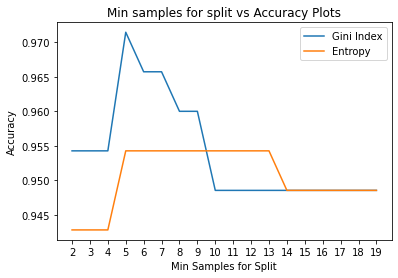

In [41]:
plt.title('Min samples for split vs Accuracy Plots')
gini_accuracies = []
entropy_accuracies = []
for d in range(2, 20):
    dt_gini = decision_tree(X_train, y_train, 'gini', min_samples_split=d)
    gini_acc = accuracy_score(y_test, dt_gini.predict(X_test))
    gini_accuracies.append(gini_acc)
    dt_entropy = decision_tree(X_train, y_train, 'entropy', min_samples_split=d)
    entropy_acc = accuracy_score(y_test, dt_entropy.predict(X_test))
    entropy_accuracies.append(entropy_acc)
plt.xticks(range(2,20))
plt.plot(range(2,20), gini_accuracies, label='Gini Index')
plt.plot(range(2,20), entropy_accuracies, label='Entropy')
plt.xlabel('Min Samples for Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

dt_best_gini_accuracy = max(dt_best_gini_accuracy, np.max(gini_accuracies))
dt_best_entropy_accuracy = max(dt_best_entropy_accuracy, np.max(entropy_accuracies))

### Method 3: Pruning Method: Cost Complexity Pruning

Greater values of ccp_alpha increase the number of nodes pruned. Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.

To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

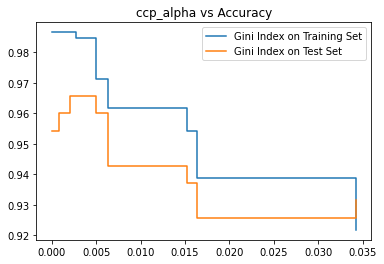

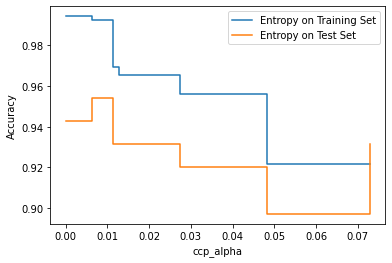

In [42]:
gini_path = dt_gini.cost_complexity_pruning_path(X_train, y_train)
entropy_path = dt_entropy.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_gini = gini_path.ccp_alphas[:-1]
ccp_alphas_entropy = entropy_path.ccp_alphas[:-1]

plt.title('ccp_alpha vs Accuracy')

# Gini Index
accuracy_list = []
accuracy_train_list = []
for i in ccp_alphas_gini:
    dt_gini = decision_tree(X_train, y_train, 'gini', ccp_alpha = i)
    accuracy_train_list.append(accuracy_score(y_train, dt_gini.predict(X_train)))
    accuracy = accuracy_score(y_test, dt_gini.predict(X_test))
    accuracy_list.append(accuracy)
plt.plot(ccp_alphas_gini, accuracy_train_list, label='Gini Index on Training Set', drawstyle="steps-post")
plt.plot(ccp_alphas_gini, accuracy_list, label='Gini Index on Test Set', drawstyle="steps-post")
plt.legend()
plt.show()

dt_best_gini_accuracy = max(dt_best_gini_accuracy, np.max(accuracy_list))

# Entropy
accuracy_list = []
accuracy_train_list = []
for i in ccp_alphas_entropy:
    dt_entropy = decision_tree(X_train, y_train, 'entropy', ccp_alpha = i)
    accuracy_train_list.append(accuracy_score(y_train, dt_entropy.predict(X_train)))
    accuracy = accuracy_score(y_test, dt_entropy.predict(X_test))
    accuracy_list.append(accuracy)
plt.plot(ccp_alphas_entropy, accuracy_train_list, label='Entropy on Training Set', drawstyle="steps-post")
plt.plot(ccp_alphas_entropy, accuracy_list, label='Entropy on Test Set', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

dt_best_entropy_accuracy = max(dt_best_entropy_accuracy, np.max(accuracy_list))

### Method 4: Controllling the number of samples required to be at leaf node

Increasing the value slightly increases the accuracy of the model because when it is low, the tree might overfit on the training data. Higher values ensure that the tree doesnot overfit the training dataset by creating many small branches exclusively with one sample each, i.e. with impurity of 0.

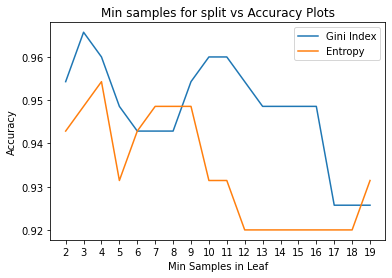

In [43]:
plt.title('Min samples for split vs Accuracy Plots')
gini_accuracies = []
entropy_accuracies = []
for d in range(2, 20):
    dt_gini = decision_tree(X_train, y_train, 'gini', min_samples_leaf=d)
    gini_acc = accuracy_score(y_test, dt_gini.predict(X_test))
    gini_accuracies.append(gini_acc)
    dt_entropy = decision_tree(X_train, y_train, 'entropy', min_samples_leaf=d)
    entropy_acc = accuracy_score(y_test, dt_entropy.predict(X_test))
    entropy_accuracies.append(entropy_acc)
plt.xticks(range(2,20))
plt.plot(range(2,20), gini_accuracies, label='Gini Index')
plt.plot(range(2,20), entropy_accuracies, label='Entropy')
plt.xlabel('Min Samples in Leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


dt_best_gini_accuracy = max(dt_best_gini_accuracy, np.max(gini_accuracies))
dt_best_entropy_accuracy = max(dt_best_entropy_accuracy, np.max(entropy_accuracies))



### 2. What is boosting, bagging and  stacking?Which class does random forests belong to and why?

Answer:

Weak learner models are models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias or because they have too high variance. 

Three meta-algorithms are used to combine weak learners:
 Boosting, Bagging and Stacking


### Boosting

Bossting method is a statistical technique that often considers homogeneous weak learners, learns them sequentially in a very adaptative way and combines them following a deterministic strategy. It generates samples of size B which are called bootstrapping samples from an initial dataset by randomly drawing with replacement B observations.

Boosting works with underfit nonparametric regression models. These models fail to understand the underlying distribution of the data, thus giving high bias. The data might have useful information, but the model might not capture it.

Hence, we train new models on the residuals of the previous model and then select the best model or combination of models.

### Bagging

Bagging considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process.

We fit several independent models and average out their predictions in order to obtain a model with a lower variance. However, in practice, we cannot fully fit independent models because that would require too much data. Hence, we rely on the approximate properties of bootstrap samples like representativity and independence, to fit models that are almost independent. 

We create multiple bootstrap samples so that each new bootstrap sample acts as another independent dataset drawn from true distribution. Then, we can fit a weak learner for each of these samples and finally aggregate them to obtain an ensemble model with less variance than its components.

### Stacking

Stacking considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions. The idea of stacking is to learn several different weak learners and combine them by training a meta-model to output predictions based on the multiple predictions returned by these weak models. Instead of using weights for combining models, we train another model to decide when to use a model in the ensemble to get better results.

### Which class does random forests belong to and why?

The random forest approach is a bagging method where deep trees, fitted on bootstrap samples, are combined to produce an output with lower variance. Desicion trees are in general overfit models (without pruning). Using bootstrap aggregating or bagging in random forests on decision trees, we get better results.

3. Implement random forest algorithm using different decision trees . 

In [44]:
class RandomForest:
    def __init__(self, max_depth, min_size, n_trees, n_features, criterion):
        self.n_trees = n_trees
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_size = min_size
        self.n_features = n_features
        self.forest = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        for _ in range(self.n_trees):
            samples = np.random.choice(np.arange(X.shape[0]), size=X.shape[0], replace=True)
            X_sample = X[samples]
            y_sample = y[samples]
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_size , max_features=self.n_features, criterion=self.criterion)
            tree.fit(X_sample, y_sample)
            self.forest.append(tree)
 
    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = []
        for tree in self.forest:
            y_pred.append(tree.predict(X_test))
        y = np.swapaxes(y_pred, 0, 1)
        predictions = []
        for prediction in y:
            count = Counter(prediction)
            predictions.append(count.most_common(1)[0][0])
        return predictions
    
    def accuracy(self, X_test, y_test):
        X_test = np.array(X_test)
        y_test = np.array(y_test)
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)

In [45]:
rf = RandomForest(max_depth=10, min_size=2, n_trees=20, n_features=2, criterion='gini')
rf.fit(X_train, y_train)
rf_acc = rf.accuracy(X_test, y_test)
print('Random Forest Accuracy: ', rf_acc)

Random Forest Accuracy:  0.9714285714285714


4. Report the accuracies obtained after using the Random forest algorithm and compare it with the best accuracies obtained with the decision trees. 

In [46]:
rf_gini = RandomForest(max_depth=10, min_size=2, n_trees=200, n_features=2, criterion='gini')
rf_gini.fit(X_train, y_train)

rf_entropy = RandomForest(max_depth=10, min_size=2, n_trees=200, n_features=2, criterion='entropy')
rf_entropy.fit(X_train, y_train)

rf_gini_accuracy = accuracy_score(y_test, rf_gini.predict(X_test))
rf_entropy_accuracy = accuracy_score(y_test, rf_entropy.predict(X_test))

print('Random Forest Accuracy (Gini): ', rf_gini_accuracy)
print('Random Forest Accuracy (Entropy): ', rf_entropy_accuracy)

print('Best Decision Tree Accuracy (Gini): ', dt_best_gini_accuracy)
print('Best Decision Tree Accuracy (Entropy): ', dt_best_entropy_accuracy)

Random Forest Accuracy (Gini):  0.9828571428571429
Random Forest Accuracy (Entropy):  0.9828571428571429
Best Decision Tree Accuracy (Gini):  0.9714285714285714
Best Decision Tree Accuracy (Entropy):  0.9542857142857143
